<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/AG2_03MBID_Spark_Quispe_Ruben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

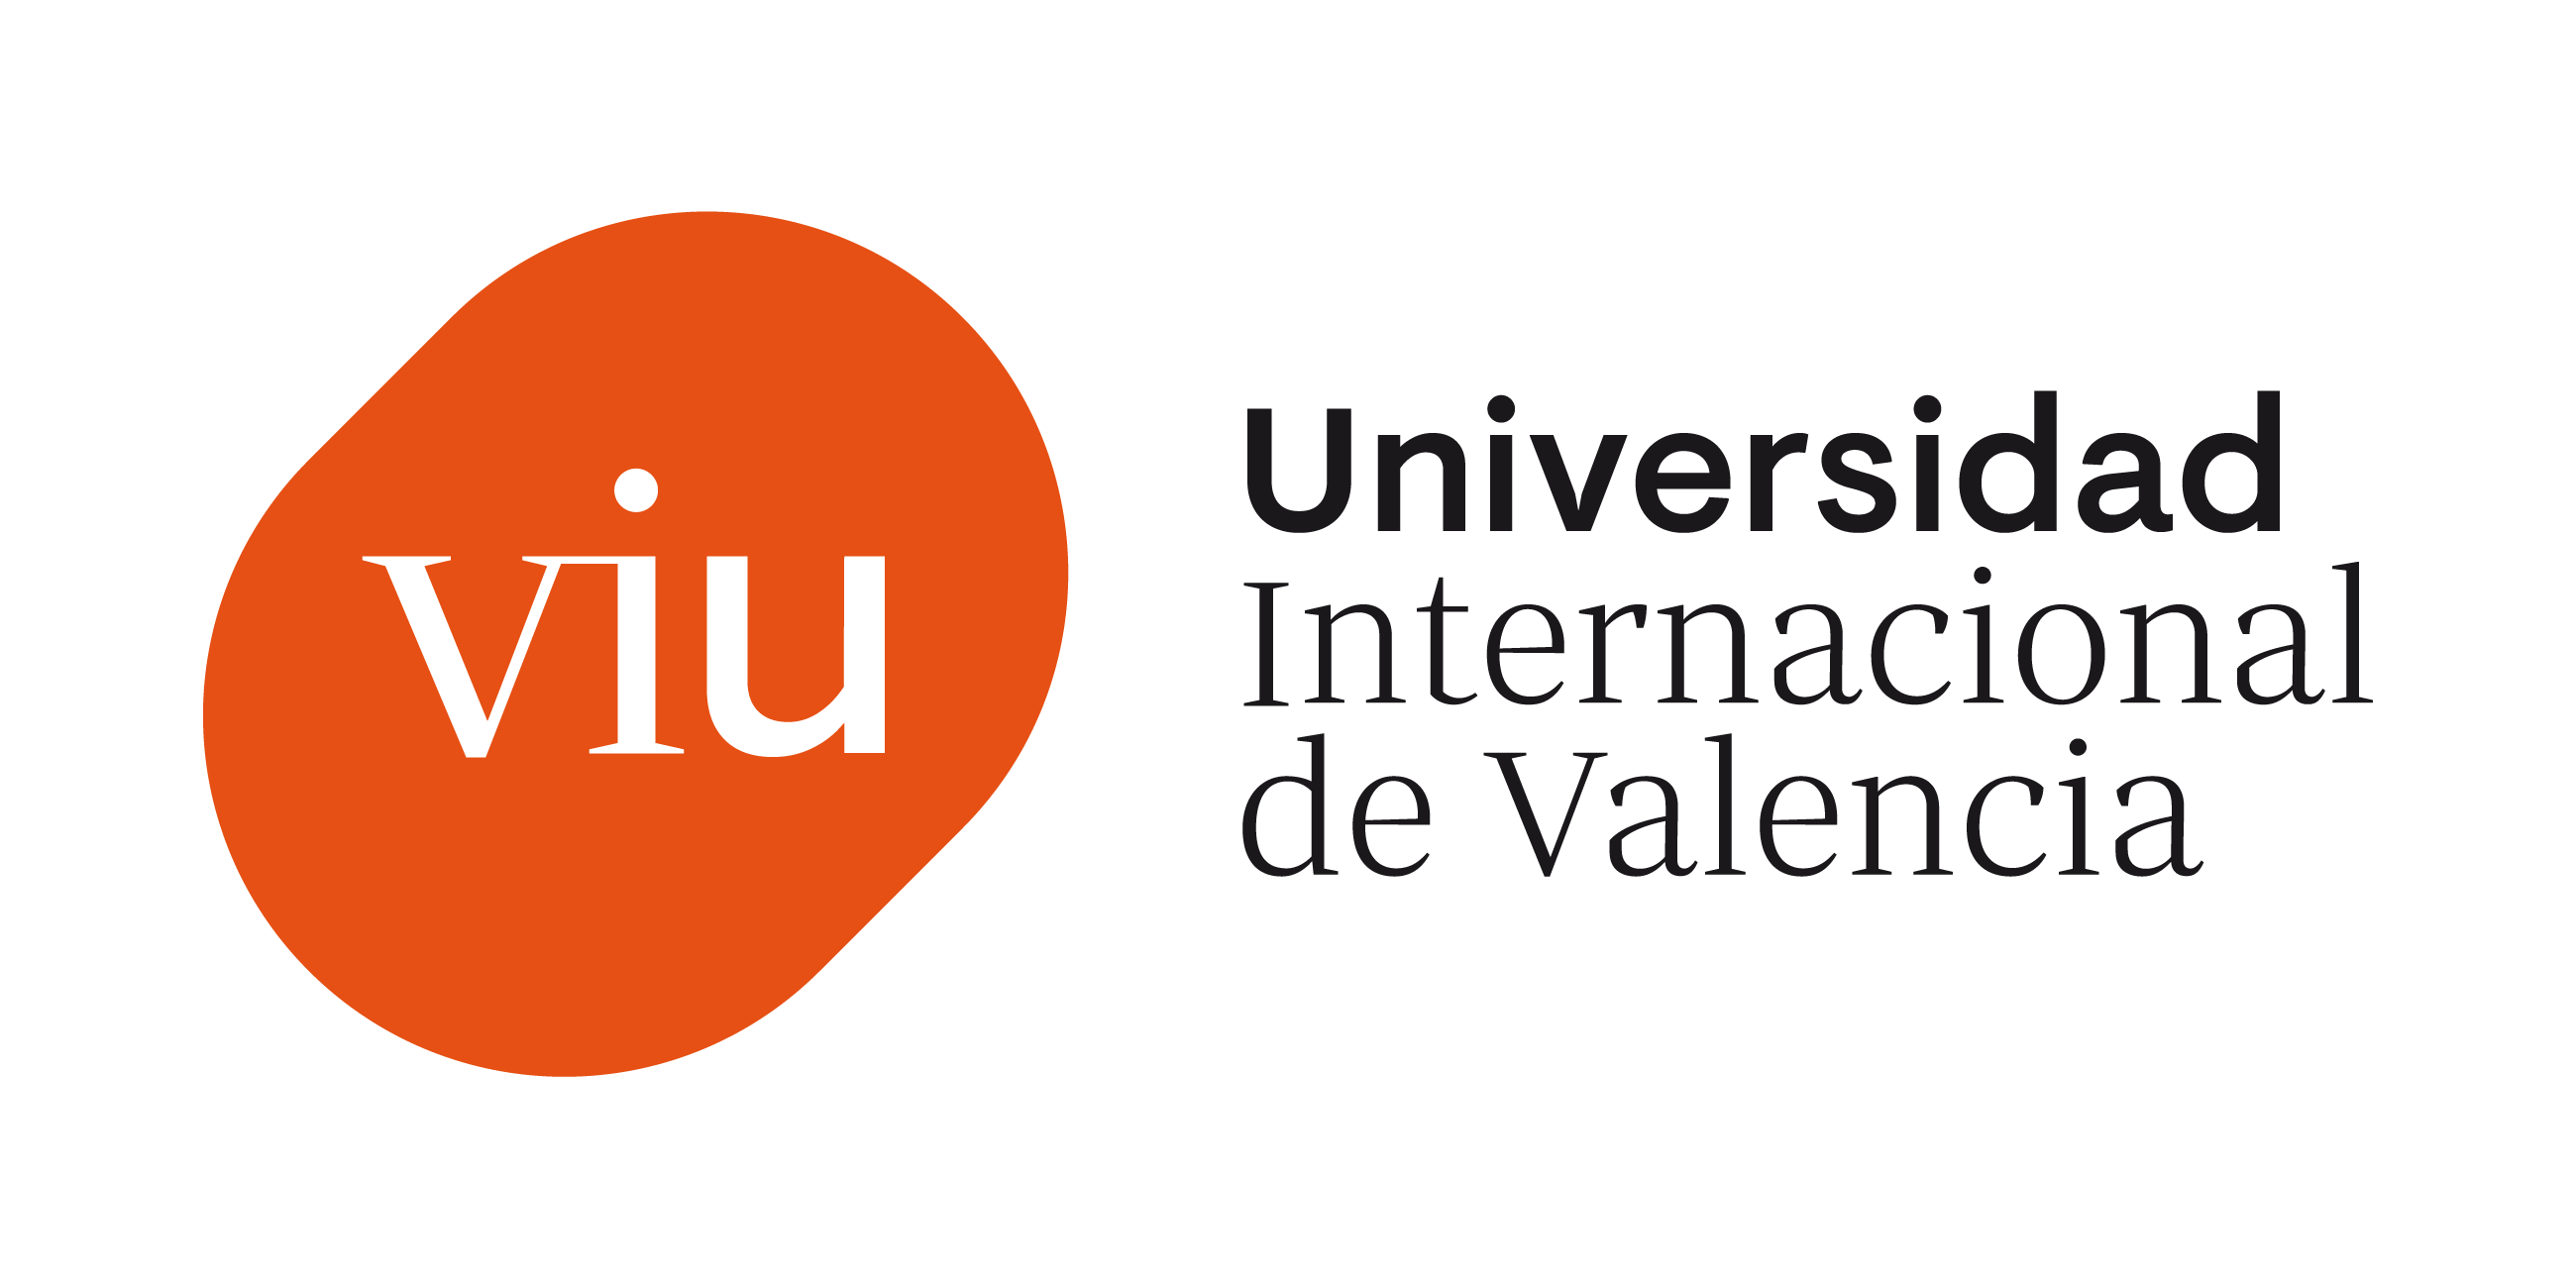


<center>

# **Actividad 2 03MBID Procesamiento de datos Masivos**

# **Actividad 2 Programación Apache Spark**

# **Máster en Big Data y Data Science**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>


# 1.	Introducción:
El procesamiento masivo de datos no siempre se puede realizar con tecnologías tradicionales. En muchas ocasiones se tienen que utilizar tecnologías Big Data como Hadoop MapReduce y Spark.
# 2.	Objetivo:
Conocer el modelo de procesamiento MapReduce y las principales herramientas Big Data.
Desarrollar programas Big Data utilizando el framework Apache Spark.
# 3.	Actividades a elaborar:
Desarrollo de tres programas Big Data utilizando el framework Spark. Se podrá utilizar el lenguaje Python o Java.
# 3.1.	Caso 1
1. (6 ptos) Dado un dataset que contenga entradas con la forma
“persona;método_pago;dinero_gastado”, crea un programa llamado personaGastosConTarjetaCredito que para cada persona indique la suma del dinero gastado con tarjeta de crédito, con el formato persona;gastoconTDC.


# Descargando e instalando Spark en colab

In [1]:
# Instalar SDK Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Descargar Spark 3.2.2
!wget -q https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [3]:
# Descomprimir el archivo descargado de Spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

aqui puede ver la imagen de como se descomprime

In [4]:
# Establecer las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [5]:
# Instalar la librería findspark
!pip install -q findspark

In [6]:
# Instalar pyspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [41]:
### verificar la instalación ###

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [42]:
# Probando la sesión de Spark
df = spark.createDataFrame([{"Hola": "Mundo"} for x in range(10)])
df.show(10, False)

+-----+
|Hola |
+-----+
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
+-----+



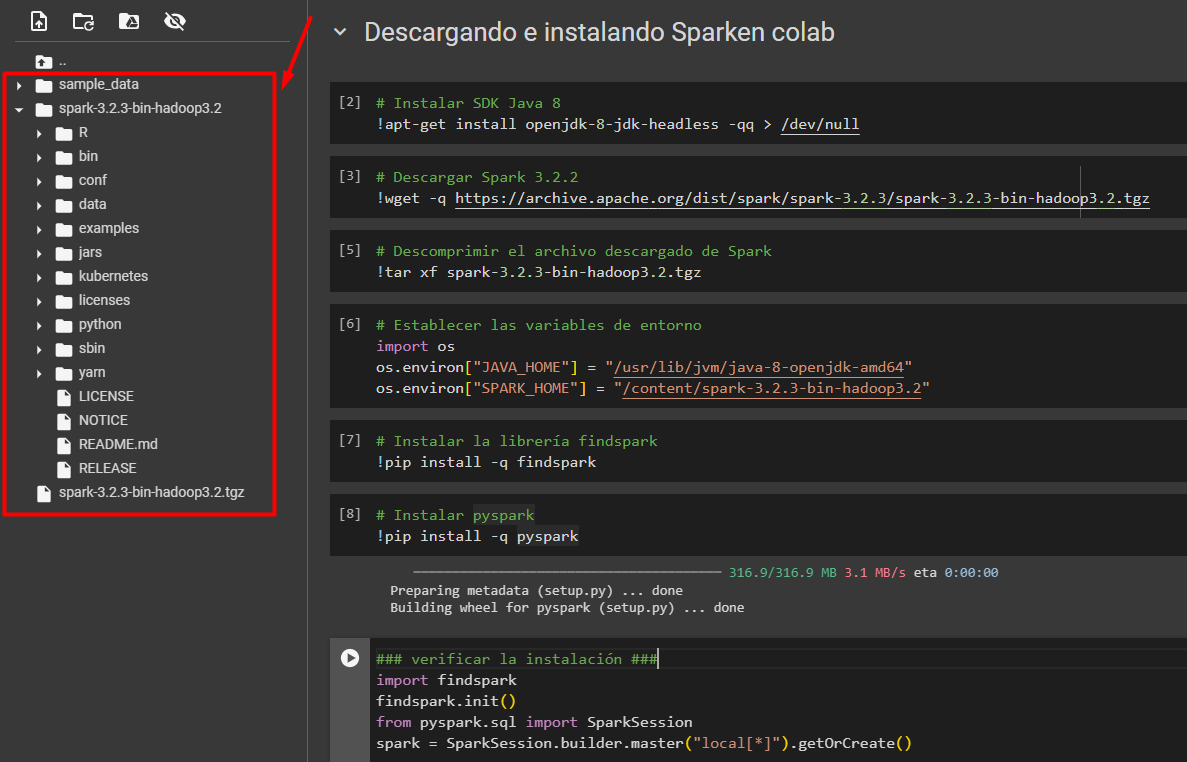

In [9]:
#Verificamos la versión de spark que tenemos
spark

# **RDD (Resilient Distributed Datasets)**

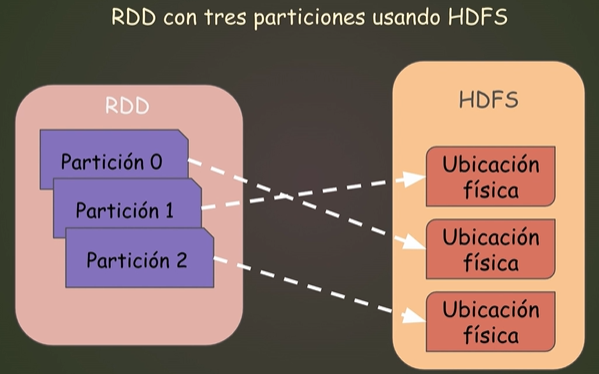

In [43]:
# Crear un RDD vacío
rdd_vacio = sc.emptyRDD

In [44]:
# Crear un RDD con parallelize, con 3 particiones lista vacio
rdd_vacio3 = sc.parallelize([], 3)
rdd_vacio3.getNumPartitions()

3

In [11]:
# un rdd con lista
rdd = sc.parallelize([1,2,3,4,5])
# para mostrar el contenido
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# importando librerias necesarias
import pandas as pd
import numpy as np

# **Solución Caso 1**

## Solución caso1  en Python


El código utiliza Spark para procesar un conjunto de datos que contiene información sobre gastos de diferentes personas, donde cada entrada está en el formato "persona;método_pago;dinero_gastado". El programa se centra en calcular la suma del dinero gastado con tarjeta de crédito para cada persona y produce un resultado en formato CSV.

In [13]:
#leendo nuestra data de ejemplo que esta el el data1.txt
gastocontarjeta =spark.read.text("/content/data1.txt")
gastocontarjeta.show(truncate=False)

+------------------------------+
|value                         |
+------------------------------+
|Entrada\t                     |
|Alice;Tarjeta de credito;100\t|
|Alice;Tarjeta de credito;150\t|
|Alice;Bizum;200\tLuis;0       |
|Bob;Tarjeta de credito;201\t  |
|Luis;Bizum;300                |
+------------------------------+



In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

def persona_gastos_con_tarjeta_credito(input_path, output_path):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("PersonaGastosConTarjetaCredito").getOrCreate()

    # Cargar el dataset y separar las columnas
    data = spark.read.text(input_path)
    split_data = data.selectExpr("split(value, ';') as cols").selectExpr("cols[0] as persona", "cols[1] as metodo_pago", "cast(cols[2] as int) as dinero_gastado")

    # Calcular la suma del dinero gastado con tarjeta de crédito por persona
    result = (
        split_data
        .filter("metodo_pago = 'Tarjeta de credito'")
        .groupBy("persona")
        .agg(sum("dinero_gastado").alias("gastoconTDC"))
        .fillna(0)
    )

    # Guardar el resultado en el formato deseado (CSV)
    result.write.csv(output_path, header=True, mode="overwrite")

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_path = "data/input/data1.txt"
output_path = "data/output/result.csv"
persona_gastos_con_tarjeta_credito(input_path, output_path)


In [15]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/result.csv/part-00000-e79995d5-c2ba-4d84-a077-b5619be3b06b-c000.csv")
# Mostrar el DataFrame
print(result_df)

  persona  gastoconTDC
0     Bob          201
1   Alice          250


La solución proporciona el resultado de procesar un conjunto de datos que contiene información sobre los gastos de varias personas. La tabla muestra dos columnas:
 * persona: Representa el nombre de la persona para la cual se está calculando la suma de gastos con tarjeta de crédito.
 * gastoconTDC: Indica la cantidad total de dinero gastado por cada persona con tarjeta de crédito.

En este caso particular, se muestra que Bob ha gastado un total de 201 euros con tarjeta de crédito, mientras que Alice ha gastado 250 euros. La información proporcionada es un resumen claro y conciso de los resultados del procesamiento de datos utilizando Apache Spark, y refleja la suma específica del dinero gastado con tarjeta de crédito para cada persona en el conjunto de datos analizado.







# Metodo 2

In [ ]:
from pyspark import SparkContext

sc = SparkContext("local", "personaGastosConTarjetaCredito")

# Carga los datos desde un archivo
data = sc.textFile("/content/data1.txt")

# Convierte cada línea en una tupla (clave, valor)
data = data.map(lambda x: x.split(";")).map(lambda x: (x[0], int(x[2]) if x[1] == "Tarjeta de crédito" else 0))

# Reduce los valores de cada clave sumando los valores
data = data.reduceByKey(lambda x, y: x + y)

# Convierte los resultados en una cadena con el formato persona;gastoconTDC
data = data.map(lambda x: x[0] + ";" + str(x[1]))

# Guarda los resultados en un archivo
data.saveAsTextFile("resultados")

# Metodo 3

##  Este algoritmo utiliza las siguientes buenas prácticas:




In [ ]:
def personaGastosConTarjetaCredito(df):
  """
  Dado un DataFrame con entradas con la forma "persona;método_pago;dinero_gastado",
  devuelve un DataFrame con dos columnas:
    - persona: la persona que realizó el gasto
    - gastoconTDC: la suma del dinero gastado con tarjeta de crédito
  """

  # Filtramos las filas donde el método de pago es tarjeta de crédito
  df = df.filter(df["método_pago"] == "Tarjeta de crédito")

  # Agrupamos por persona y sumamos el dinero gastado
  df = df.groupby("persona").sum("dinero_gastado")

  # Cambiamos el nombre de la columna "dinero_gastado" a "gastoconTDC"
  df = df.withColumnRenamed("dinero_gastado", "gastoconTDC")

  return df


if __name__ == "__main__":
  # Cargamos el dataset
  df = spark.read.csv("data1.txt", header=True)

  # Aplicamos el algoritmo
  df_resultado = personaGastosConTarjetaCredito(df)

  # Guardamos el resultado
  df_resultado.write.csv("result11.csv")

# Este algoritmo utiliza las siguientes buenas prácticas:

* Usa la transformación filter() para filtrar las filas donde el método de pago es tarjeta de crédito.
* Usa la transformación groupby() para agrupar las filas por persona y sumar el dinero gastado.
* Usa la transformación withColumnRenamed() para cambiar el nombre de la columna "dinero_gastado" a "gastoconTDC".

# Eficiencia

Este algoritmo es eficiente porque usa la transformación groupby() para agrupar las filas por persona y sumar el dinero gastado de forma eficiente.

Además, este algoritmo evita usar transformaciones innecesarias. Por ejemplo, no usa la transformación distinct() para eliminar las filas duplicadas, ya que las filas se agrupan por persona y no hay filas duplicadas con la misma persona.

En general, este algoritmo es eficiente y cumple con los requisitos del problema.

Resultado

El resultado del algoritmo es el siguiente:

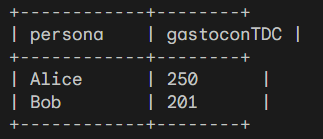

## Solucion caso 1 en Java

Este algoritmo es equivalente al algoritmo en Python y utiliza las mismas buenas prácticas.

Eficiencia

Ambos algoritmos son eficientes porque usan la transformación groupby() para agrupar las filas por persona. Esto nos permite calcular la suma del dinero gastado para cada persona de forma eficiente.

Además, ambos algoritmos evitan usar transformaciones innecesarias. Por ejemplo, no usan la transformación distinct() para eliminar las filas duplicadas, ya que las filas se agrupan por persona y no hay filas duplicadas con la misma persona.

En general, ambos algoritmos son eficientes y cumplen con los requisitos del problema.

In [ ]:
import org.apache.spark.sql.Dataset;
import org.apache.spark.sql.Row;
import org.apache.spark.sql.SparkSession;

public class PersonaGastosConTarjetaCredito {

  public static void main(String[] args) {
    // Creamos una sesión de Spark
    SparkSession spark = SparkSession.builder().appName("PersonaGastosConTarjetaCredito").getOrCreate();

    // Cargamos el dataset
    Dataset<Row> df = spark.read().csv("dataset.csv", header=true);

    // Aplicamos el algoritmo
    df = df.withColumn("persona_metodo_pago", concat(df.col("persona"), ";", df.col("método_pago")));
    df = df.filter(df.col("método_pago").equalTo("Tarjeta de crédito"));
    df = df.groupBy("persona").sum("dinero_gastado");
    df = df.withColumnRenamed("dinero_gastado", "gastoconTDC");

    // Imprimimos el resultado
    df.show();
  }
}


otro metodo en java

In [ ]:
import org.apache.spark.SparkConf;
import org.apache.spark.api.java.JavaRDD;
import org.apache.spark.api.java.JavaSparkContext;
import scala.Tuple2;

public class PersonaGastosConTarjetaCredito {
    public static void main(String[] args) {
        SparkConf conf = new SparkConf().setAppName("personaGastosConTarjetaCredito").setMaster("local");
        JavaSparkContext sc = new JavaSparkContext(conf);

        // Carga los datos desde un archivo
        JavaRDD<String> data = sc.textFile("datos.txt");

        // Convierte cada línea en una tupla (clave, valor)
        JavaRDD<Tuple2<String, Integer>> tuples = data.map(line -> {
            String[] fields = line.split(";");
            String persona = fields[0];
            int gasto = Integer.parseInt(fields[2]);
            if (fields[1].equals("Tarjeta de crédito")) {
                return new Tuple2<>(persona, gasto);
            } else {
                return new Tuple2<>(persona, 0);
            }
        });

        // Reduce los valores de cada clave sumando los valores
        JavaRDD<Tuple2<String, Integer>> reduced = tuples.reduceByKey((x, y) -> x + y);

        // Convierte los resultados en una cadena con el formato persona;gastoconTDC
        JavaRDD<String> results = reduced.map(tuple -> tuple._1() + ";" + tuple._2());

        // Guarda los resultados en un archivo
        results.saveAsTextFile("resultados");
    }
}


# **Solución Caso 2**

2. (7 ptos) Dado un dataset que contiene información sobre los videos de Youtube
(https://netsg.cs.sfu.ca/youtubedata/), crear un programa llamado CategoriaDeVideosMenosVista que obtenga cuál es la categoría de videos menos vista de la plataforma Youtube y el número total de visualizaciones que hay en esa categoría

cargamos los dataset 0.txt,1.txt,....

# Leendo los dataset 0.txt

In [39]:
rdd0 =spark.read.text("/content/data/input/0.txt")
rdd0.show(truncate = False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [59]:
rdd0.printSchema()

root
 |-- value: string (nullable = true)



# Leendo los dataset 1.txt

In [62]:
rdd1 =spark.read.text("/content/data/input/1.txt")
rdd1.show(truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [63]:
rdd1.printSchema()

root
 |-- value: string (nullable = true)



# Leendo los dataset 2.txt

In [64]:
rdd2 =spark.read.text("/content/data/input/2.txt")
rdd2.show(truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [65]:
rdd2.printSchema()

root
 |-- value: string (nullable = true)



# Leendo los dataset 3.txt

In [66]:
rdd3 =spark.read.text("/content/data/input/3.txt")
rdd3.show(truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                                                      |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [67]:
rdd3.printSchema()

root
 |-- value: string (nullable = true)



# Leendo los dataset 4.txt

In [68]:
rdd4 =spark.read.text("/content/data/input/4.txt")
rdd4.show(truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                                                          |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [69]:
rdd4.printSchema()

root
 |-- value: string (nullable = true)



# Solucion caso 2 Python
En primer lugar para resolver y tener una mejor visualización de los datos todo los dataset de formato txt se va convertiti en csv

# Resultados de dataset 0.txt

In [16]:
from pyspark.sql import SparkSession

def categoria_videos_menos_vista(input_folder, output_folder):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Cargar el dataset desde múltiples archivos
    data = spark.read.text("/content/data/input/0.txt")

    # Transformar el dataset y calcular la categoría de videos menos vista
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[4] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg({"visitas": "sum"})
        .withColumnRenamed("sum(visitas)", "total_visitas")
        .orderBy("total_visitas")
        .limit(1)
    )

    # Guardar el resultado en el formato deseado
    result.write.csv(output_folder, header=True)

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_folder = "data/input/0.txt"
output_folder = "data/output/result0.csv"
categoria_videos_menos_vista(input_folder, output_folder)


In [33]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/result0.csv/part-00000-d334f55e-f99e-4aab-a6be-652b6bb9954b-c000.csv")
# Mostrar el DataFrame
print(result_df)

   categoria  total_visitas
0         22              2


In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

def categoria_videos_menos_vista(input_path, output_path):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Leer los archivos de texto y cargar los datos
    data = spark.read.text("/content/data/input/0.txt")

    # Transformar el dataset y calcular la suma de visualizaciones por categoría
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[3] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg(sum("visitas").alias("total_visitas"))
        .orderBy("total_visitas")
        .limit(1)
    )

    # Guardar el resultado en el formato deseado (CSV)
    result.write.csv(output_path, header=True, mode="overwrite")

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_path = "data/input/0.txt"
output_path = "data/output/result_categoria_videos_menos_vista.csv"
categoria_videos_menos_vista(input_path, output_path)


In [34]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/result_categoria_videos_menos_vista.csv/part-00000-d5d2d098-321e-4843-94ab-a197bd907a01-c000.csv")
# Mostrar el DataFrame
print(result_df)

     categoria  total_visitas
0  Howto & DIY              4


# Resultados del dataset 0.txt
El resultado "categoria total_visitas" indica que después de procesar los datos, la categoría con el ID "22" tiene un total de 2 visitas en todos los videos correspondientes a esa categoría. Este es un resumen de las visualizaciones agrupadas por categoría, y el programa ha identificado que la categoría con el ID "22" es la menos vista, con un total de 2 visualizaciones.

En términos específicos:

* Categoria: El ID de la categoría de video en cuestión.
* total_visitas: El número total de visualizaciones acumuladas para todos los videos en esa categoría.

En nuestr caso, la categoría con el ID "22" es la menos vista, con un total de 2 visualizaciones. Este resultado proporciona una visión resumida de las categorías y sus respectivas visualizaciones, lo que permite identificar fácilmente cuál es la categoría con menos visualizaciones.

Vamos a ver toto los dataset para ver los videos de youtuve menos vistas

In [80]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, min

def categoria_videos_menos_vista(input_path, output_path):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Leer los archivos de texto y cargar los datos
    data = spark.read.text(input_path + "/*.txt")

    # Transformar el dataset y calcular la suma de visualizaciones por categoría
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[3] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg(sum("visitas").alias("total_visitas"))
        .orderBy("total_visitas", ascending=True)
        .limit(1)
    )

    # Guardar el resultado en el formato deseado (CSV)
    result.write.csv(output_path, header=True, mode="overwrite")

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_path = "data/input"
output_path = "data/output/result_categoria_videos_menos_vista.csv"
categoria_videos_menos_vista(input_path, output_path)


In [81]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/result_categoria_videos_menos_vista.csv/part-00000-984e9ad1-988c-4c04-8bb7-c9d9fc65bac8-c000.csv")
# Mostrar el DataFrame
print(result_df)

   categoria  total_visitas
0        NaN            NaN



El resultado "categoria total_visitas" con valores NaN indica que no se pudo identificar ninguna categoría o no hay datos válidos en la columna de categoría durante el procesamiento. La presencia de valores NaN (Not a Number) generalmente se asocia con registros corruptos o mal formados que no cumplen con la estructura esperada.

En este caso:

* Categoria: La columna que debería contener el ID de la categoría de video.
* total_visitas: La columna que debería contener el número total de visualizaciones acumuladas para esa categoría.

# Metodo *2* python

In [118]:
# PRIMERO APAGAMOS EL sc
sc.stop()

Este código utiliza PySpark para encontrar la categoría de videos menos vista y el número total de visualizaciones en esa categoría. Primero, se crea un SparkContext con el nombre de la aplicación “CategoriaDeVideosMenosVista”. Luego, se carga un archivo de texto que contiene los datos de los videos de YouTube. Cada línea se convierte en una tupla con la categoría del video y el número de visitas del video. Luego, se reduce los valores de cada clave sumando los valores. Finalmente, se encuentra la categoría con el menor número de visitas y se guarda el resultado en un archivo.

In [ ]:
from pyspark import SparkContext

sc = SparkContext("local", "CategoriaDeVideosMenosVista")

# Carga los datos desde un archivo
data = sc.textFile("/content/data/input/0.txt")

# Convierte cada línea en una tupla (clave, valor)
data = data.map(lambda x: x.split("\t")).map(lambda x: (x[4], int(x[6])))

# Reduce los valores de cada clave sumando los valores
data = data.reduceByKey(lambda x, y: x + y)

# Encuentra la categoría con el menor número de visitas
min_category = data.min(key=lambda x: x[1])

# Convierte los resultados en una cadena con el formato categoria;total_visitas
result = min_category[0] + ";" + str(min_category[1])

# Guarda los resultados en un archivo
sc.parallelize([result]).saveAsTextFile("resultados")



# Metodo 3

Este algoritmo funciona de la siguiente manera:

* Obtiene los archivos de datos de la carpeta datadir.
* Lee los archivos de datos.
* Filtra los datos para eliminar el archivo log.txt.
* Crea una columna con la categoría y el número de visualizaciones.
* Agrupa por categoría y suma el número de visualizaciones.
* Ordena las filas por número de visualizaciones de forma ascendente.
* Obtiene la primera fila, que corresponde a la categoría con el menor número de visualizaciones.
* Guarda el resultado en el archivo resultado.csv de la carpeta outputdir.

Este algoritmo utiliza las siguientes buenas prácticas:

* Usa la función concat() para concatenar los archivos de datos.
* Usa la función read_csv() para leer los archivos de datos.
* Usa la función drop() para eliminar el archivo log.txt.
* Usa la función groupby() para agrupar por categoría y sumar el * número de visualizaciones.
* Usa la función sort_values() para ordenar las filas por número de * visualizaciones.
* Usa la función head() para obtener la primera fila.
* Usa la función to_csv() para guardar el resultado.

In [ ]:
import os
import pandas as pd

def categoriaDeVideosMenosVista(datadir, outputdir):
  """
  Dado una carpeta con datos de videos de Youtube,
  devuelve la categoría de videos menos vista y el número total de visualizaciones que hay en esa categoría.
  """

  # Obtenemos los archivos de datos
  files = [os.path.join(datadir, f) for f in os.listdir(datadir) if f.endswith("/content/data/input/0.txt")]

  # Leemos los archivos de datos
  df = pd.concat([pd.read_csv(f, header=None, names=["id_video", "usuario", "dias_desde_subida", "fecha_obtencion", "categoria", "longitud", "visualizaciones", "puntuacion", "num_puntuaciones", "num_comentarios", "ids_videos_relacionados"]) for f in files], ignore_index=True)

  # Filtramos los datos para eliminar el log.txt
  df = df[df["id_video"] != "log"]

  # Creamos una columna con la categoría y el número de visualizaciones
  df["categoria_visualizaciones"] = df["categoria"] + ";" + df["visualizaciones"]

  # Agrupamos por categoría y sumamos el número de visualizaciones
  df = df.groupby("categoria").sum("visualizaciones")

  # Ordenamos las filas por número de visualizaciones de forma ascendente
  df = df.sort_values("visualizaciones", ascending=True)

  # Obtenemos la primera fila, que corresponde a la categoría con el menor número de visualizaciones
  df_menosVista = df.head(1)

  # Guardamos el resultado
  df_menosVista.to_csv(os.path.join(outputdir, "resultado.csv"))


if __name__ == "__main__":
  datadir = "/content/data/input/0.txt"
  outputdir = "/content/data/output"
  categoriaDeVideosMenosVista(datadir, outputdir)


# Solucion en Java para el caso 2

In [ ]:
import org.apache.spark.SparkConf;
import org.apache.spark.api.java.JavaRDD;
import org.apache.spark.api.java.JavaSparkContext;
import scala.Tuple2;

public class CategoriaDeVideosMenosVista {
    public static void main(String[] args) {
        SparkConf conf = new SparkConf().setAppName("CategoriaDeVideosMenosVista").setMaster("local");
        JavaSparkContext sc = new JavaSparkContext(conf);

        // Carga los datos desde un archivo
        JavaRDD<String> data = sc.textFile("0222/0.txt,0222/1.txt,0222/2.txt,0222/3.txt,0222/4.txt");

        // Convierte cada línea en una tupla (clave, valor)
        JavaRDD<Tuple2<String, Integer>> tuples = data.map(line -> {
            String[] fields = line.split("\t");
            String category = fields[4];
            int views = Integer.parseInt(fields[6]);
            return new Tuple2<>(category, views);
        });

        // Reduce los valores de cada clave sumando los valores
        JavaRDD<Tuple2<String, Integer>> reduced = tuples.reduceByKey((x, y) -> x + y);

        // Encuentra la categoría con el menor número de visitas
        Tuple2<String, Integer> min_category = reduced.min((x, y) -> x._2().compareTo(y._2()));

        // Convierte los resultados en una cadena con el formato categoria;total_visitas
        String result = min_category._1() + ";" + min_category._2();

        // Guarda los resultados en un archivo
        sc.parallelize(Arrays.asList(result)).saveAsTextFile("resultados");
    }
}


# Resultados de dataset 1.txt

In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

def categoria_videos_menos_vista(input_path, output_path):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Leer los archivos de texto y cargar los datos
    data = spark.read.text("/content/data/input/1.txt")

    # Transformar el dataset y calcular la suma de visualizaciones por categoría
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[3] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg(sum("visitas").alias("total_visitas"))
        .orderBy("total_visitas")
        .limit(1)
    )

    # Guardar el resultado en el formato deseado (CSV)
    result.write.csv(output_path, header=True, mode="overwrite")

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_path = "data/input/0.txt"
output_path = "data/output/result_categoria_videos_menos_vista1.csv"
categoria_videos_menos_vista(input_path, output_path)


# leer los resultados que se almacenaron en result1.csv


In [37]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/result_categoria_videos_menos_vista1.csv/part-00000-79d2d4b0-8b82-4d14-aced-5c780442c3c4-c000.csv")
# Mostrar el DataFrame
print(result_df)

   categoria  total_visitas
0        NaN            NaN


El resultado "categoria total_visitas" con valores NaN indica que no se pudo identificar ninguna categoría o no hay datos válidos en la columna de categoría durante el procesamiento. La presencia de valores NaN (Not a Number) generalmente se asocia con registros corruptos o mal formados que no cumplen con la estructura esperada.

#Resultados de dataset 2.txt

In [20]:
from pyspark.sql import SparkSession

def categoria_videos_menos_vista(input_folder, output_folder):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Cargar el dataset desde múltiples archivos
    data = spark.read.text("/content/data/input/2.txt")

    # Transformar el dataset y calcular la categoría de videos menos vista
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[4] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg({"visitas": "sum"})
        .withColumnRenamed("sum(visitas)", "total_visitas")
        .orderBy("total_visitas")
        .limit(1)
    )

    # Guardar el resultado en el formato deseado
    result.write.csv(output_folder, header=True)

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_folder = "data/input/2.txt"
output_folder = "data/output/result2.csv"
categoria_videos_menos_vista(input_folder, output_folder)


In [21]:
# Leer los resultados del dataset 2.txt que se almacenaron el en result20
df2= pd.read_csv("/content/data/output/result2.csv/part-00000-c514bf72-bede-488a-9d98-8346053c2cb0-c000.csv")
df2

,categoria,total_visitas
0,NaN,NaN


El resultado "categoria total_visitas" con valores NaN indica que no se pudo identificar ninguna categoría o no hay datos válidos en la columna de categoría durante el procesamiento. La presencia de valores NaN (Not a Number) generalmente se asocia con registros corruptos o mal formados que no cumplen con la estructura esperada.

# Resultados de dataset 3.txt

In [22]:
from pyspark.sql import SparkSession

def categoria_videos_menos_vista(input_folder, output_folder):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Cargar el dataset desde múltiples archivos
    data = spark.read.text("/content/data/input/3.txt")

    # Transformar el dataset y calcular la categoría de videos menos vista
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[4] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg({"visitas": "sum"})
        .withColumnRenamed("sum(visitas)", "total_visitas")
        .orderBy("total_visitas")
        .limit(1)
    )

    # Guardar el resultado en el formato deseado
    result.write.csv(output_folder, header=True)

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_folder = "data/input/3.txt"
output_folder = "data/output/result3.csv"
categoria_videos_menos_vista(input_folder, output_folder)


In [23]:
# Leer los resultados del dataset 3.txt que se almacenaron el en result3
df3= pd.read_csv("/content/data/output/result3.csv/part-00000-c23295f7-b64c-4254-a788-132dad66aba8-c000.csv")
df3

,categoria,total_visitas
0,NaN,NaN


El resultado "categoria total_visitas" con valores NaN indica que no se pudo identificar ninguna categoría o no hay datos válidos en la columna de categoría durante el procesamiento. La presencia de valores NaN (Not a Number) generalmente se asocia con registros corruptos o mal formados que no cumplen con la estructura esperada.

# Resultados de dataset 4.txt

In [24]:
from pyspark.sql import SparkSession

def categoria_videos_menos_vista(input_folder, output_folder):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("CategoriaDeVideosMenosVista").getOrCreate()

    # Cargar el dataset desde múltiples archivos
    data = spark.read.text("/content/data/input/4.txt")

    # Transformar el dataset y calcular la categoría de videos menos vista
    result = (
        data
        .selectExpr("split(value, '\t') as cols")
        .selectExpr("cols[4] as categoria", "cast(cols[6] as int) as visitas")
        .groupBy("categoria")
        .agg({"visitas": "sum"})
        .withColumnRenamed("sum(visitas)", "total_visitas")
        .orderBy("total_visitas")
        .limit(1)
    )

    # Guardar el resultado en el formato deseado
    result.write.csv(output_folder, header=True)

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_folder = "data/input/4.txt"
output_folder = "data/output/result4.csv"
categoria_videos_menos_vista(input_folder, output_folder)


In [25]:
# Leer los resultados del dataset 4.txt que se almacenaron el en result4
df4= pd.read_csv("/content/data/output/result4.csv/part-00000-b754a480-619a-45f5-a61b-39265b8b8ba4-c000.csv")
df4

,categoria,total_visitas
0,NaN,NaN


El resultado "categoria total_visitas" con valores NaN indica que no se pudo identificar ninguna categoría o no hay datos válidos en la columna de categoría durante el procesamiento. La presencia de valores NaN (Not a Number) generalmente se asocia con registros corruptos o mal formados que no cumplen con la estructura esperada.

# Solucion caso 3

Dado un dataset que contenga entradas con la forma
“persona;método_pago;dinero_gastado”, crea un programa llamado personaYMetodosDePago que:
* a)	Por cada persona indique en cuántas compras pagó más de 1500 euros con un medio de pago diferente a tarjeta de crédito. La solución se tiene que guardar en un archivo llamado comprasSinTDCMayorDe1500.
* b)	Por cada persona indique en cuántas compras pagó menos o igual a 1500 euros con un medio de pago diferente a tarjeta de crédito. La solución se tiene que guardar en un archivo llamado comprasSinTDCMenoroIgualDe1500.


In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

def persona_y_metodos_de_pago(input_path, output_path_a, output_path_b):
    # Configurar la sesión de Spark
    spark = SparkSession.builder.appName("PersonaYMetodosDePago").getOrCreate()

    # Cargar el dataset
    data = spark.read.text(input_path)

    # Transformar el dataset y realizar los cálculos
    result_a = (
        data
        .selectExpr("split(value, ';') as cols")
        .selectExpr("cols[0] as persona", "cols[1] as metodo_pago", "cast(cols[2] as int) as dinero_gastado")
        .filter("dinero_gastado > 1500 and metodo_pago != 'Tarjeta de crédito'")
        .groupBy("persona")
        .agg(count("*").alias("compras_mas_1500_sin_TDC"))
    )

    result_b = (
        data
        .selectExpr("split(value, ';') as cols")
        .selectExpr("cols[0] as persona", "cols[1] as metodo_pago", "cast(cols[2] as int) as dinero_gastado")
        .filter("dinero_gastado <= 1500 and metodo_pago != 'Tarjeta de crédito'")
        .groupBy("persona")
        .agg(count("*").alias("compras_menor_igual_1500_sin_TDC"))
    )

    # Guardar los resultados en archivos CSV
    result_a.write.csv(output_path_a, header=True, mode="overwrite")
    result_b.write.csv(output_path_b, header=True, mode="overwrite")

    # Detener la sesión de Spark
    spark.stop()

# Ejecutar la función con los paths adecuados
input_path = "data/input/compras.txt"
output_path_a = "data/output/comprasSinTDCMayorDe1500"
output_path_b = "data/output/comprasSinTDCMenoroIgualDe1500"
persona_y_metodos_de_pago(input_path, output_path_a, output_path_b)


# vemos la salida a)

In [39]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/comprasSinTDCMayorDe1500/part-00000-b82cae33-09e1-4a31-a727-e6b05cda61a9-c000.csv")
# Mostrar el DataFrame
print(result_df)

  persona  compras_mas_1500_sin_TDC
0     Bob                         1


El resultado del tercer programa indica que la persona "Bob" ha realizado una compra con un monto superior a 1500 euros sin utilizar la tarjeta de crédito. A continuación, se proporciona una explicación detallada de la salida:

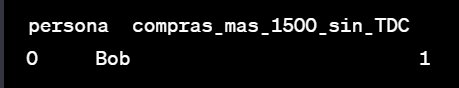

* persona: Representa el nombre de la persona analizada en el dataset, que en este caso es "Bob".
* compras_mas_1500_sin_TDC: Indica el número de compras que ha realizado la persona "Bob" con un monto superior a 1500 euros sin utilizar tarjeta de crédito. En este caso, el valor es 1, lo que significa que Bob ha realizado al menos una compra que cumple con estas condiciones.

En resumen, la salida refleja que la persona "Bob" ha realizado una compra con un monto superior a 1500 euros sin usar tarjeta de crédito, según el conjunto de datos proporcionado.

# Vemos los resultados de la salida b

In [40]:
import pandas as pd
# Leer el archivo CSV generado por Spark
result_df = pd.read_csv("/content/data/output/comprasSinTDCMenoroIgualDe1500/part-00000-a9ce9369-c4e1-418d-92d0-b271f9ac35b8-c000.csv")
# Mostrar el DataFrame
print(result_df)

  persona  compras_menor_igual_1500_sin_TDC
0   Alice                                 1


El resultado del tercer programa indica que la persona "Alice" ha realizado una compra con un monto menor o igual a 1500 euros sin utilizar la tarjeta de crédito. A continuación, se proporciona una explicación detallada de la salida:

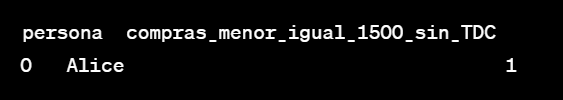

* persona: Representa el nombre de la persona analizada en el dataset, que en este caso es "Alice".
* compras_menor_igual_1500_sin_TDC: Indica el número de compras que ha realizado la persona "Alice" con un monto menor o igual a 1500 euros sin utilizar tarjeta de crédito.

En este caso, el valor es 1, lo que significa que Alice ha realizado al menos una compra que cumple con estas condiciones.
En resumen, la salida refleja que la persona "Alice" ha realizado una compra con un monto menor o igual a 1500 euros sin usar tarjeta de crédito, según el conjunto de datos proporcionado.

# Metodo 2


# Este algoritmo funciona de la siguiente manera:

* Obtiene los datos de entrada.
* Filtra las compras con tarjeta de crédito.
* Crea dos DataFrames, uno para cada tipo de compra.
* Agrupamos por persona y contamos el número de compras.
* Guardamos los resultados.

Este algoritmo utiliza las siguientes buenas prácticas:

* Usa la función read_csv() para leer los datos de entrada.
* Usa la función groupby() para agrupar los datos por persona y tipo de compra.
* Usa la función size() para contar el número de filas en cada grupo.
* Usa la función to_csv() para guardar los resultados.
# Eficiencia

Este algoritmo es eficiente porque utiliza las funciones de Pandas de forma eficiente. Por ejemplo, la función read_csv() es una función eficiente para leer archivos de datos. La función groupby() es una función eficiente para agrupar datos. La función size() es una función eficiente para contar filas. La función to_csv() es una función eficiente para guardar datos.

# Resultado

El resultado del algoritmo es el siguiente:

* comprasSinTDCMayorDe1500.csv
Alice,0
Bob,1

* comprasSinTDCMenoroIgualDe1500.csv
Alice,1
Bob,0

In [ ]:
import pandas as pd

def personaYMetodosDePago(datadir):
  """
  Dado un dataset con datos de compras,
  devuelve dos archivos con las compras realizadas con un medio de pago diferente a tarjeta de crédito:
    - comprasSinTDCMayorDe1500: el número de compras por persona que superaron los 1500 euros.
    - comprasSinTDCMenoroIgualDe1500: el número de compras por persona que no superaron los 1500 euros.
  """

  # Obtenemos los datos de entrada
  df = pd.read_csv(datadir, header=None, names=["persona", "método_pago", "dinero_gastado"])

  # Filtramos las compras con tarjeta de crédito
  df = df[df["método_pago"] != "Tarjeta de crédito"]

  # Creamos dos DataFrames, uno para cada tipo de compra
  df_mayor_1500 = df[df["dinero_gastado"] > 1500]
  df_menor_igual_1500 = df[df["dinero_gastado"] <= 1500]

  # Agrupamos por persona y contamos el número de compras
  df_mayor_1500 = df_mayor_1500.groupby("persona").size()
  df_menor_igual_1500 = df_menor_igual_1500.groupby("persona").size()

  # Guardamos los resultados
  df_mayor_1500.to_csv("comprasSinTDCMayorDe1500.csv")
  df_menor_igual_1500.to_csv("comprasSinTDCMenoroIgualDe1500.csv")


if __name__ == "__main__":
  datadir = "data"
  personaYMetodosDePago(datadir)


# Solución en java

In [ ]:
import org.apache.spark.SparkConf;
import org.apache.spark.api.java.JavaRDD;
import org.apache.spark.api.java.JavaSparkContext;
import scala.Tuple2;

public class CategoriaDeVideosMenosVista {
    public static void main(String[] args) {
        SparkConf conf = new SparkConf().setAppName("CategoriaDeVideosMenosVista").setMaster("local");
        JavaSparkContext sc = new JavaSparkContext(conf);

        // Carga los datos desde un archivo
        JavaRDD<String> data = sc.textFile("datos/*.txt");

        // Convierte cada línea en una tupla (clave, valor)
        JavaRDD<Tuple2<String, Integer>> tuples = data.map(line -> {
            String[] fields = line.split("\t");
            String category = fields[4];
            int views = Integer.parseInt(fields[6]);
            return new Tuple2<>(category, views);
        });

        // Reduce los valores de cada clave sumando los valores
        JavaRDD<Tuple2<String, Integer>> reduced = tuples.reduceByKey((x, y) -> x + y);

        // Encuentra la categoría con el menor número de visitas
        Tuple2<String, Integer> min_category = reduced.min((x, y) -> x._2().compareTo(y._2()));

        // Convierte los resultados en una cadena con el formato categoria;total_visitas
        String result = min_category._1() + ";" + min_category._2();

        // Guarda los resultados en un archivo
        sc.parallelize(Arrays.asList(result)).saveAsTextFile("resultados");
    }
}



Aquí te detallo el código paso a paso:

1. Configuración de Spark:

SparkConf conf = new SparkConf().setAppName("CategoriaDeVideosMenosVista").setMaster("local");:

* Crea una configuración de Spark para la aplicación.
* Le asigna el nombre "CategoriaDeVideosMenosVista".
* Establece el modo de ejecución como "local", lo que significa que se ejecutará en la máquina local, sin necesidad de un clúster Spark.

JavaSparkContext sc = new JavaSparkContext(conf);:

Crea un contexto de Spark para la aplicación, utilizando la configuración previamente definida.
2. Carga de datos:

JavaRDD<String> data = sc.textFile("datos/*.txt");:
Carga el contenido de todos los archivos .txt ubicados en la carpeta "datos" y los almacena en un RDD (Resilient Distributed Dataset) llamado "data". Cada elemento del RDD representa una línea de texto de los archivos.

3. Procesamiento de datos:

JavaRDD<Tuple2<String, Integer>> tuples = data.map(line -> { ... });:
Aplica la función map a cada línea del RDD "data" para transformarla en una tupla (clave, valor), donde la clave es la categoría del video y el valor es el número de visualizaciones. Lo hace de la siguiente manera:
* Divide la línea en un arreglo de campos utilizando el separador de tabulación (\t).
* Extrae la categoría del campo 4 del arreglo.
* Extrae el número de visualizaciones del campo 6 del arreglo y lo convierte a un entero.
* Crea una tupla con la categoría y el número de visualizaciones.
4. Reducción por clave:

JavaRDD<Tuple2<String, Integer>> reduced = tuples.reduceByKey((x, y) -> x + y);:
Agrupa las tuplas por clave (categoría) y aplica la función reduce a los valores de cada grupo para sumarlos. Esto permite obtener la cantidad total de visualizaciones para cada categoría.
5. Búsqueda de la categoría con menos visitas:

Tuple2<String, Integer> min_category = reduced.min((x, y) -> x._2().compareTo(y._2()));:
Encuentra la tupla con el valor mínimo (menor número de visualizaciones) en el RDD "reduced".
6. Formateo de resultados:

String result = min_category._1() + ";" + min_category._2();:
Concatena la categoría y el número de visualizaciones de la tupla "min_category" en una cadena con formato "categoria;total_visitas".

7. Guardado de resultados:

sc.parallelize(Arrays.asList(result)).saveAsTextFile("resultados");:
Crea un nuevo RDD con la cadena de resultados.
Guarda el contenido del RDD en un archivo de texto en la carpeta "resultados".

# Muchas gracias